## CMPINF 2100 Fall 2021 - Week 05

### Continue exploring gapminder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Define the URL to download the gapminder data set.

In [2]:
gap_url = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/gapminder.tsv'

In [3]:
gap_df = pd.read_csv( gap_url, sep = '\t' )

In [4]:
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [6]:
gap_df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [7]:
gap_df.describe()

year      lifeExp           pop      gdpPercap
count  1704.00000  1704.000000  1.704000e+03    1704.000000
mean   1979.50000    59.474439  2.960121e+07    7215.327081
std      17.26533    12.917107  1.061579e+08    9857.454543
min    1952.00000    23.599000  6.001100e+04     241.165876
25%    1965.75000    48.198000  2.793664e+06    1202.060309
50%    1979.50000    60.712500  7.023596e+06    3531.846988
75%    1993.25000    70.845500  1.958522e+07    9325.462346
max    2007.00000    82.603000  1.318683e+09  113523.132900

In [8]:
gap_df.describe(include=[object])

country continent
count          1704      1704
unique          142         5
top     Afghanistan    Africa
freq             12       624

## Basic counts

In [9]:
gap_df.continent.value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

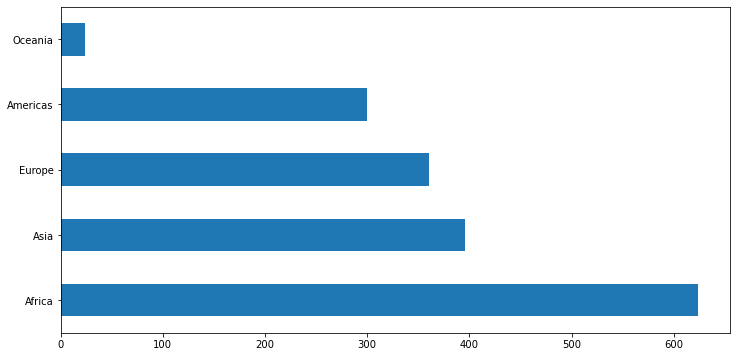

In [10]:
fig, ax = plt.subplots(figsize=(12,6))

gap_df.continent.value_counts().plot(kind='barh', ax=ax)

plt.show()

In [11]:
gap_df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [12]:
gap_df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [13]:
gap_df['country'].value_counts()

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

In [14]:
type( gap_df.country.value_counts() )

pandas.core.series.Series

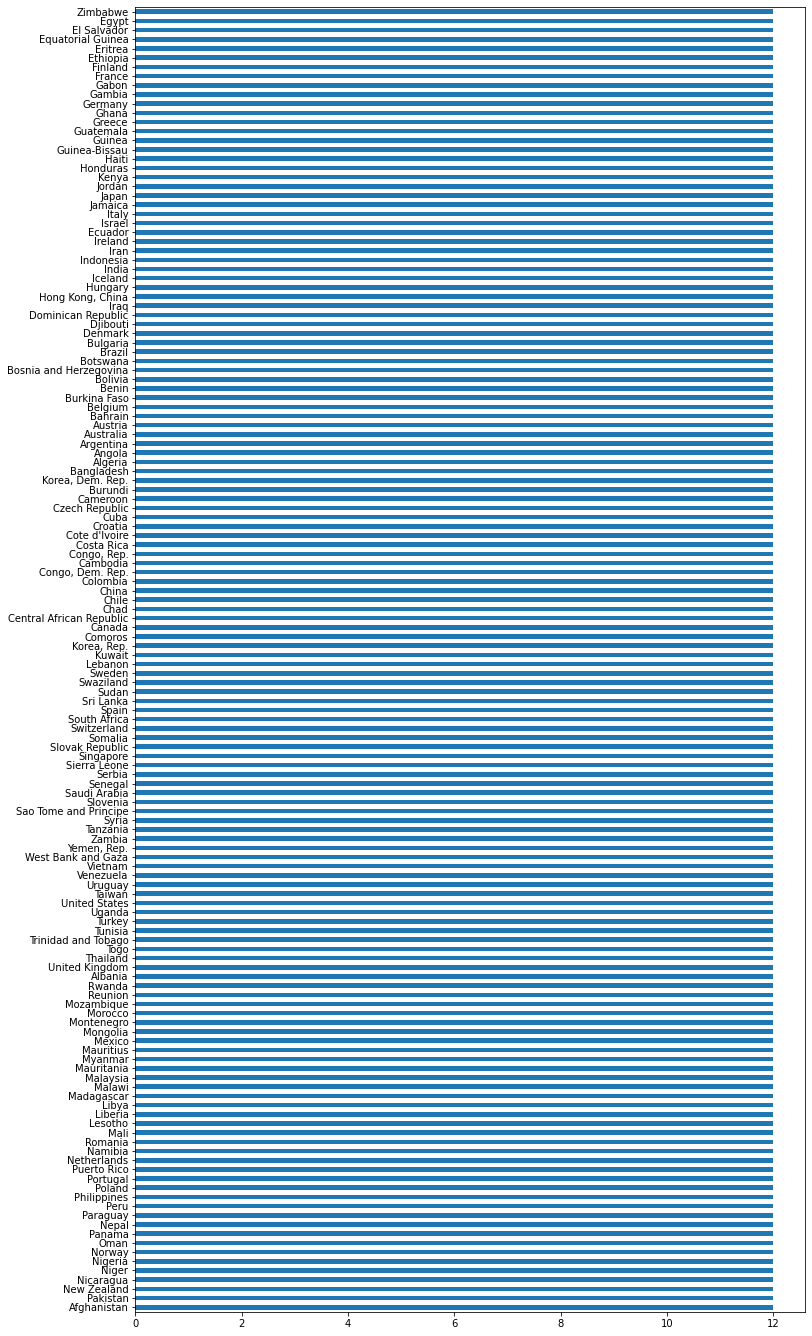

In [15]:
fig, ax = plt.subplots(figsize=(12, 24))

gap_df.country.value_counts().plot(kind='barh', ax=ax)

plt.show()

In [16]:
gap_df.country.value_counts().value_counts()

12    142
Name: country, dtype: int64

Repeat this chaining of methods with `continent`.

In [17]:
gap_df.continent.value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [18]:
gap_df.continent.value_counts().value_counts()

624    1
396    1
360    1
300    1
24     1
Name: continent, dtype: int64

What are the unique values? And how many unique values are there?

In [20]:
gap_df.country.value_counts().unique()

array([12], dtype=int64)

In [21]:
gap_df.country.value_counts().nunique()

1

In [22]:
gap_df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [23]:
gap_df.year.value_counts()

1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: year, dtype: int64

In [24]:
gap_df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [25]:
gap_df.year.nunique()

12

What does 1 row correspond to in gapminder?

In [26]:
gap_df.shape[0]

1704

In [27]:
gap_df.year.nunique()

12

In [28]:
gap_df.country.nunique()

142

In [29]:
gap_df.year.nunique() * gap_df.country.nunique()

1704

One row corresponds to 1 country in 1 year.

In [30]:
gap_df

country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]

Continuous or numeric variables.

In [31]:
gap_df.describe()

year      lifeExp           pop      gdpPercap
count  1704.00000  1704.000000  1.704000e+03    1704.000000
mean   1979.50000    59.474439  2.960121e+07    7215.327081
std      17.26533    12.917107  1.061579e+08    9857.454543
min    1952.00000    23.599000  6.001100e+04     241.165876
25%    1965.75000    48.198000  2.793664e+06    1202.060309
50%    1979.50000    60.712500  7.023596e+06    3531.846988
75%    1993.25000    70.845500  1.958522e+07    9325.462346
max    2007.00000    82.603000  1.318683e+09  113523.132900

Let's look at the summary statistics with a boxplot instead.

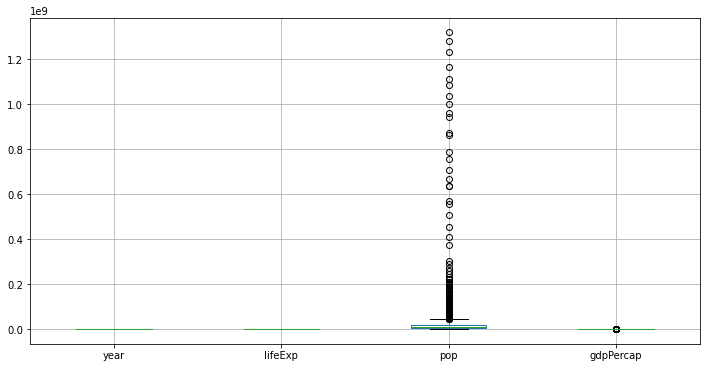

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_df.boxplot(ax=ax)

plt.show()

Let's focus on the `lifeExp`.

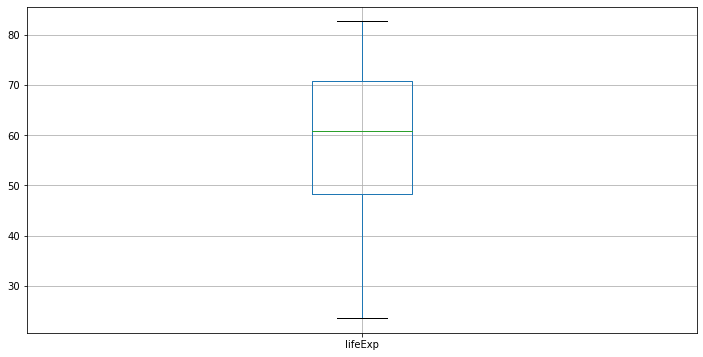

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_df.boxplot(ax=ax, column=['lifeExp'])

plt.show()

We can include the average with the `showmeans` argument.

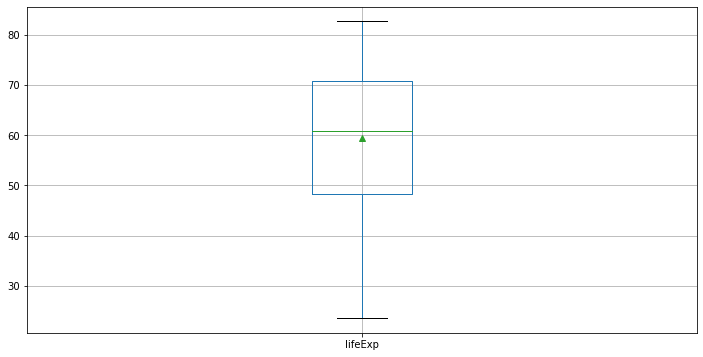

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_df.boxplot(ax=ax, column=['lifeExp'], showmeans=True)

plt.show()

In [35]:
gap_df[ gap_df.lifeExp > 60 ]

country continent  year  lifeExp       pop    gdpPercap
14        Albania    Europe  1962   64.820   1728137  2312.888958
15        Albania    Europe  1967   66.220   1984060  2760.196931
16        Albania    Europe  1972   67.690   2263554  3313.422188
17        Albania    Europe  1977   68.930   2509048  3533.003910
18        Albania    Europe  1982   70.420   2780097  3630.880722
...           ...       ...   ...      ...       ...          ...
1678  Yemen, Rep.      Asia  2002   60.308  18701257  2234.820827
1679  Yemen, Rep.      Asia  2007   62.698  22211743  2280.769906
1698     Zimbabwe    Africa  1982   60.363   7636524   788.855041
1699     Zimbabwe    Africa  1987   62.351   9216418   706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340   693.420786

[877 rows x 6 columns]

In [36]:
gap_df.lifeExp > 60

0       False
1       False
2       False
3       False
4       False
        ...  
1699     True
1700     True
1701    False
1702    False
1703    False
Name: lifeExp, Length: 1704, dtype: bool

In [37]:
type( gap_df.lifeExp > 60 )

pandas.core.series.Series

In [38]:
gap_df[ gap_df.lifeExp > 60 ]

country continent  year  lifeExp       pop    gdpPercap
14        Albania    Europe  1962   64.820   1728137  2312.888958
15        Albania    Europe  1967   66.220   1984060  2760.196931
16        Albania    Europe  1972   67.690   2263554  3313.422188
17        Albania    Europe  1977   68.930   2509048  3533.003910
18        Albania    Europe  1982   70.420   2780097  3630.880722
...           ...       ...   ...      ...       ...          ...
1678  Yemen, Rep.      Asia  2002   60.308  18701257  2234.820827
1679  Yemen, Rep.      Asia  2007   62.698  22211743  2280.769906
1698     Zimbabwe    Africa  1982   60.363   7636524   788.855041
1699     Zimbabwe    Africa  1987   62.351   9216418   706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340   693.420786

[877 rows x 6 columns]

In [39]:
gap_df.loc[ gap_df.lifeExp > 60 ]

country continent  year  lifeExp       pop    gdpPercap
14        Albania    Europe  1962   64.820   1728137  2312.888958
15        Albania    Europe  1967   66.220   1984060  2760.196931
16        Albania    Europe  1972   67.690   2263554  3313.422188
17        Albania    Europe  1977   68.930   2509048  3533.003910
18        Albania    Europe  1982   70.420   2780097  3630.880722
...           ...       ...   ...      ...       ...          ...
1678  Yemen, Rep.      Asia  2002   60.308  18701257  2234.820827
1679  Yemen, Rep.      Asia  2007   62.698  22211743  2280.769906
1698     Zimbabwe    Africa  1982   60.363   7636524   788.855041
1699     Zimbabwe    Africa  1987   62.351   9216418   706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340   693.420786

[877 rows x 6 columns]

In [40]:
gap_df.loc[ gap_df.lifeExp > 60, :]

country continent  year  lifeExp       pop    gdpPercap
14        Albania    Europe  1962   64.820   1728137  2312.888958
15        Albania    Europe  1967   66.220   1984060  2760.196931
16        Albania    Europe  1972   67.690   2263554  3313.422188
17        Albania    Europe  1977   68.930   2509048  3533.003910
18        Albania    Europe  1982   70.420   2780097  3630.880722
...           ...       ...   ...      ...       ...          ...
1678  Yemen, Rep.      Asia  2002   60.308  18701257  2234.820827
1679  Yemen, Rep.      Asia  2007   62.698  22211743  2280.769906
1698     Zimbabwe    Africa  1982   60.363   7636524   788.855041
1699     Zimbabwe    Africa  1987   62.351   9216418   706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340   693.420786

[877 rows x 6 columns]

In [41]:
gap_df.loc[ gap_df.lifeExp > 60, :].shape

(877, 6)

In [42]:
gap_df.shape

(1704, 6)

In [43]:
877 / 1704

0.5146713615023474

In [45]:
gap_df.loc[ gap_df.lifeExp > 60, :].shape[0] / gap_df.shape[0]

0.5146713615023474

In [46]:
gap_df.lifeExp.median()

60.7125

In [48]:
gap_df.loc[ gap_df.lifeExp > gap_df.lifeExp.median(), :].shape[0] / gap_df.shape[0]

0.5

How does the `lifeExp` change over time?

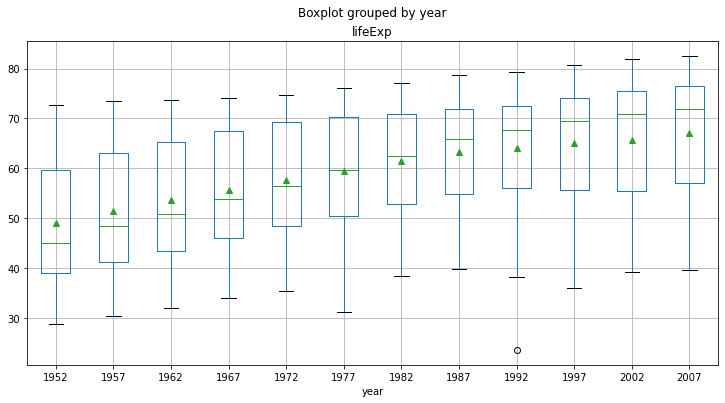

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_df.boxplot(ax=ax, column=['lifeExp'], by='year', showmeans=True)

plt.show()

In [51]:
gap_df.loc[ gap_df.year == 1952, :].lifeExp.median()

45.1355

In [52]:
gap_df.loc[ gap_df.year == 1952, 'lifeExp'].median()

45.1355

Scatter plot.

In [53]:
gap_df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

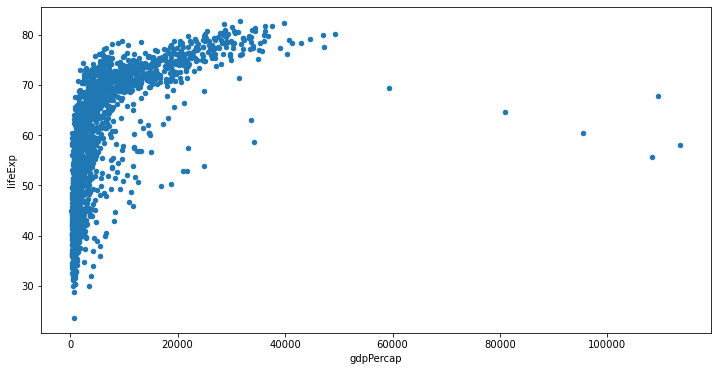

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_df.plot.scatter(x = 'gdpPercap', y = 'lifeExp', ax=ax)

plt.show()

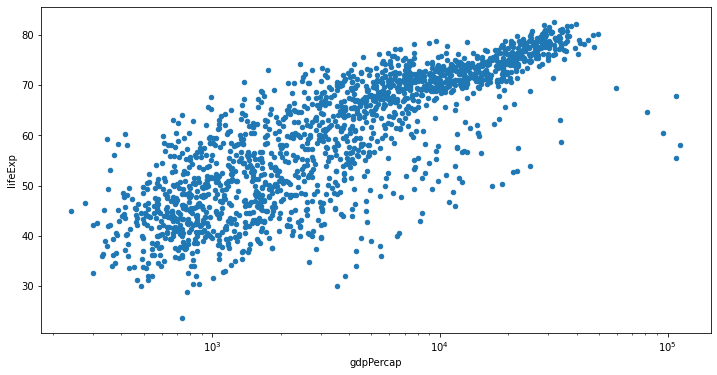

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_df.plot.scatter(x = 'gdpPercap', y = 'lifeExp', logx=True, ax=ax)

plt.show()

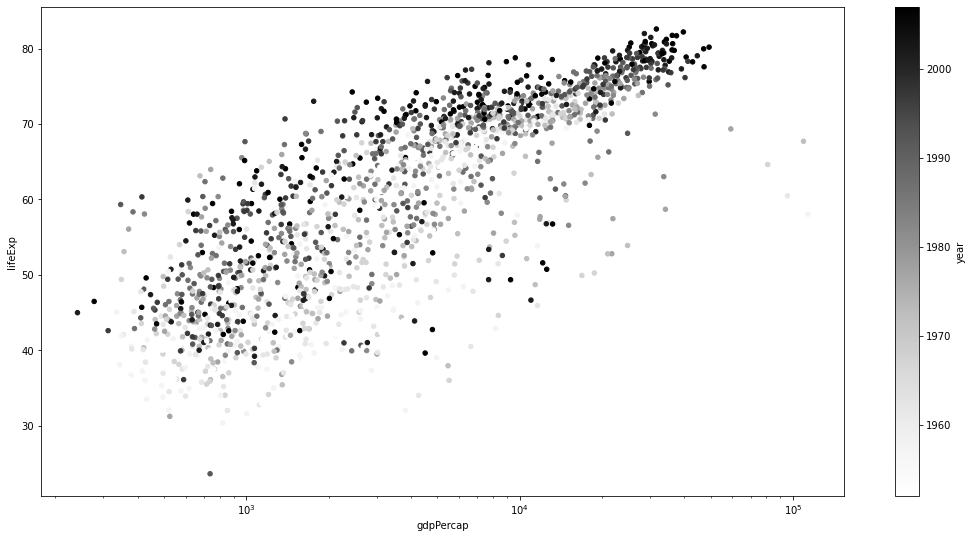

In [56]:
fig, ax = plt.subplots(figsize=(18, 9))

gap_df.plot.scatter(x = 'gdpPercap', y = 'lifeExp', c='year', logx=True, ax=ax)

plt.show()

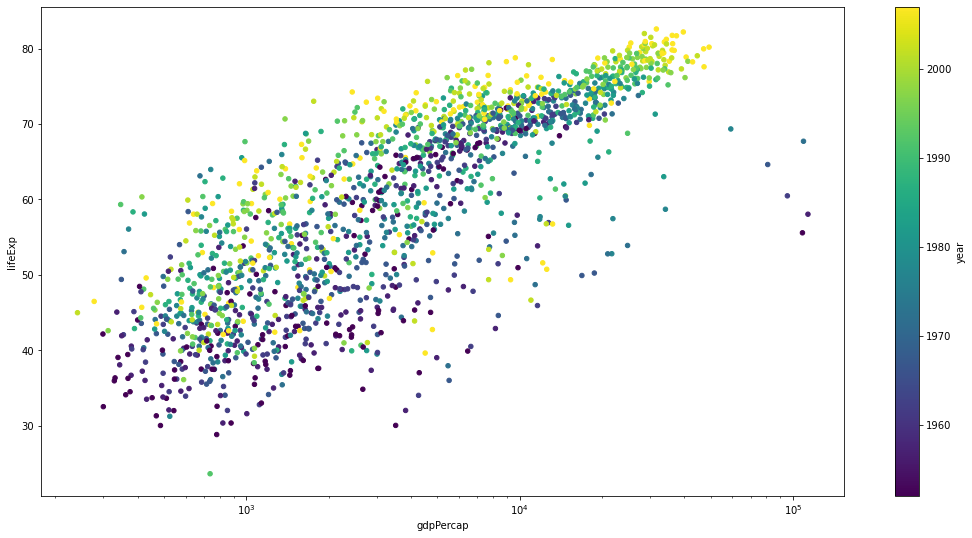

In [57]:
fig, ax = plt.subplots(figsize=(18, 9))

gap_df.plot.scatter(x = 'gdpPercap', y = 'lifeExp', c='year', colormap='viridis', logx=True, ax=ax)

plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['Asia' 'Asia' 'Asia' ... 'Africa' 'Africa' 'Africa']

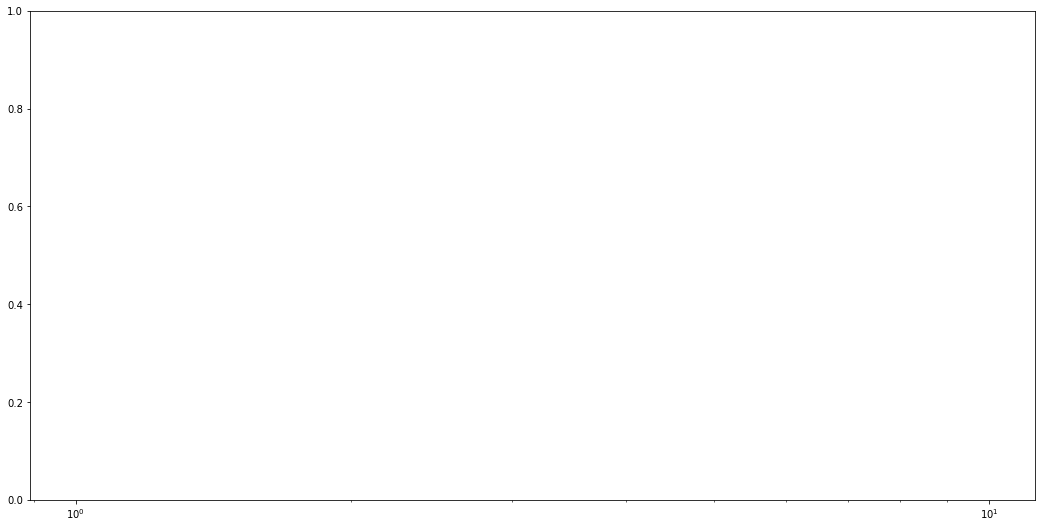

In [58]:
fig, ax = plt.subplots(figsize=(18, 9))

gap_df.plot.scatter(x = 'gdpPercap', y = 'lifeExp', c='continent', logx=True, ax=ax)

plt.show()

### Filtering by strings

Find all rows of `gap_df` that correspond to the `'United States'`.

In [59]:
gap_df.loc[ gap_df.country == 'United States' ]

country continent  year  lifeExp        pop    gdpPercap
1608  United States  Americas  1952   68.440  157553000  13990.48208
1609  United States  Americas  1957   69.490  171984000  14847.12712
1610  United States  Americas  1962   70.210  186538000  16173.14586
1611  United States  Americas  1967   70.760  198712000  19530.36557
1612  United States  Americas  1972   71.340  209896000  21806.03594
1613  United States  Americas  1977   73.380  220239000  24072.63213
1614  United States  Americas  1982   74.650  232187835  25009.55914
1615  United States  Americas  1987   75.020  242803533  29884.35041
1616  United States  Americas  1992   76.090  256894189  32003.93224
1617  United States  Americas  1997   76.810  272911760  35767.43303
1618  United States  Americas  2002   77.310  287675526  39097.09955
1619  United States  Americas  2007   78.242  301139947  42951.65309

Find any country that contains the word `'United'`.

In [60]:
gap_df.loc[ gap_df.country == 'United' ]

Empty DataFrame
Columns: [country, continent, year, lifeExp, pop, gdpPercap]
Index: []

In [61]:
gap_df.country.str.contains('United')

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: country, Length: 1704, dtype: bool

In [62]:
gap_df.country.str.contains('U')

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: country, Length: 1704, dtype: bool

In [63]:
gap_df.country.str.contains('unIted')

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: country, Length: 1704, dtype: bool

In [64]:
gap_df.loc[ gap_df.country.str.contains('United') ]

country continent  year  lifeExp        pop     gdpPercap
1596  United Kingdom    Europe  1952   69.180   50430000   9979.508487
1597  United Kingdom    Europe  1957   70.420   51430000  11283.177950
1598  United Kingdom    Europe  1962   70.760   53292000  12477.177070
1599  United Kingdom    Europe  1967   71.360   54959000  14142.850890
1600  United Kingdom    Europe  1972   72.010   56079000  15895.116410
1601  United Kingdom    Europe  1977   72.760   56179000  17428.748460
1602  United Kingdom    Europe  1982   74.040   56339704  18232.424520
1603  United Kingdom    Europe  1987   75.007   56981620  21664.787670
1604  United Kingdom    Europe  1992   76.420   57866349  22705.092540
1605  United Kingdom    Europe  1997   77.218   58808266  26074.531360
1606  United Kingdom    Europe  2002   78.471   59912431  29478.999190
1607  United Kingdom    Europe  2007   79.425   60776238  33203.261280
1608   United States  Americas  1952   68.440  157553000  13990.482080
1609   United States  Americas  1957   69.490  171984000  14847.127120
1610   United States  Americas  1962   70.210  186538000  16173.145860
1611   United States  Americas  1967   70.760  198712000  19530.365570
1612   United States  Americas  1972   71.340  209896000  21806.035940
1613   United States  Americas  1977   73.380  220239000  24072.632130
1614   United States  Americas  1982   74.650  232187835  25009.559140
1615   United States  Americas  1987   75.020  242803533  29884.350410
1616   United States  Americas  1992   76.090  256894189  32003.932240
1617   United States  Americas  1997   76.810  272911760  35767.433030
1618   United States  Americas  2002   77.310  287675526  39097.099550
1619   United States  Americas  2007   78.242  301139947  42951.653090

In [66]:
gap_df.loc[ gap_df.country.str.contains('United') ].country.value_counts()

United Kingdom    12
United States     12
Name: country, dtype: int64

In [67]:
gap_df.loc[ gap_df.country.str.contains('U') ].country.value_counts()

Uganda            12
United Kingdom    12
United States     12
Uruguay           12
Name: country, dtype: int64

In [68]:
gap_df.loc[ gap_df.country.str.contains('u') ].country.value_counts()

Australia                   12
Austria                     12
Mauritius                   12
Mozambique                  12
Nicaragua                   12
Paraguay                    12
Peru                        12
Portugal                    12
Puerto Rico                 12
Reunion                     12
Saudi Arabia                12
Slovak Republic             12
South Africa                12
Sudan                       12
Tunisia                     12
Turkey                      12
Uruguay                     12
Mauritania                  12
Kuwait                      12
Hungary                     12
Czech Republic              12
Belgium                     12
Bulgaria                    12
Burkina Faso                12
Burundi                     12
Central African Republic    12
Cuba                        12
Djibouti                    12
Honduras                    12
Dominican Republic          12
Ecuador                     12
Equatorial Guinea           12
Guatemal

In [69]:
gap_df.loc[ gap_df.country.str.contains('Rep') ].country.value_counts()

Central African Republic    12
Congo, Dem. Rep.            12
Congo, Rep.                 12
Czech Republic              12
Dominican Republic          12
Korea, Dem. Rep.            12
Korea, Rep.                 12
Slovak Republic             12
Yemen, Rep.                 12
Name: country, dtype: int64

In [70]:
gap_df.loc[ gap_df.country.str.contains('Republic') ].country.value_counts()

Central African Republic    12
Czech Republic              12
Dominican Republic          12
Slovak Republic             12
Name: country, dtype: int64

In [72]:
gap_df.loc[ gap_df.country.str.contains('\\.') ].country.value_counts()

Congo, Dem. Rep.    12
Congo, Rep.         12
Korea, Dem. Rep.    12
Korea, Rep.         12
Yemen, Rep.         12
Name: country, dtype: int64

In [73]:
gap_df.loc[ gap_df.country.str.contains('\\,') ].country.value_counts()

Congo, Dem. Rep.    12
Congo, Rep.         12
Hong Kong, China    12
Korea, Dem. Rep.    12
Korea, Rep.         12
Yemen, Rep.         12
Name: country, dtype: int64

In [74]:
gap_df.loc[ gap_df.country.str.contains('\\,') ]

country continent  year  lifeExp       pop    gdpPercap
324   Congo, Dem. Rep.    Africa  1952   39.143  14100005   780.542326
325   Congo, Dem. Rep.    Africa  1957   40.652  15577932   905.860230
326   Congo, Dem. Rep.    Africa  1962   42.122  17486434   896.314634
327   Congo, Dem. Rep.    Africa  1967   44.056  19941073   861.593242
328   Congo, Dem. Rep.    Africa  1972   45.989  23007669   904.896068
...                ...       ...   ...      ...       ...          ...
1675       Yemen, Rep.      Asia  1987   52.922  11219340  1971.741538
1676       Yemen, Rep.      Asia  1992   55.599  13367997  1879.496673
1677       Yemen, Rep.      Asia  1997   58.020  15826497  2117.484526
1678       Yemen, Rep.      Asia  2002   60.308  18701257  2234.820827
1679       Yemen, Rep.      Asia  2007   62.698  22211743  2280.769906

[72 rows x 6 columns]

In [75]:
gap_df.loc[ gap_df.country.str.contains('\\,') , 'country'].value_counts()

Congo, Dem. Rep.    12
Congo, Rep.         12
Hong Kong, China    12
Korea, Dem. Rep.    12
Korea, Rep.         12
Yemen, Rep.         12
Name: country, dtype: int64

In [76]:
gap_df.loc[ gap_df.country.str.contains('\\,') , ].value_counts()

country           continent  year  lifeExp  pop       gdpPercap  
Congo, Dem. Rep.  Africa     1952  39.143   14100005  780.542326     1
                             1957  40.652   15577932  905.860230     1
Korea, Rep.       Asia       1972  62.612   33505000  3030.876650    1
                             1967  57.716   30131000  2029.228142    1
                             1962  55.292   26420307  1536.344387    1
                                                                    ..
Congo, Rep.       Africa     2007  55.322   3800610   3632.557798    1
                             2002  52.970   3328795   3484.061970    1
                             1997  52.962   2800947   3484.164376    1
                             1992  56.433   2409073   4016.239529    1
Yemen, Rep.       Asia       2007  62.698   22211743  2280.769906    1
Length: 72, dtype: int64